In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
import time 
from PIL import Image 

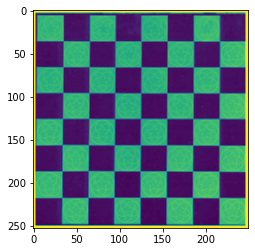

In [3]:
img = cv2.imread("chessboard00.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

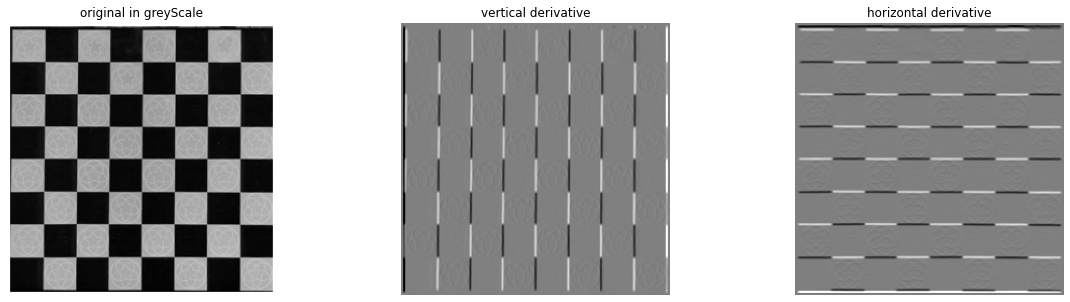

In [4]:
# set a and b and their transpose matrix 
a = np.array([[-1,0,1]])
aT = a.T
b = np.array([[1,1,1]])
bT = b.T
abT = a*b.T
baT = b*a.T

#convulotion with image to get the vertical and horizontal derivatives respectivly 
imXabT = cv2.filter2D(img, cv2.CV_32F,abT)
imXbaT = cv2.filter2D(img, cv2.CV_32F,baT)

# show images in one time 
ig, axs = plt.subplots(1,3, figsize=(20, 5))
axs[0].set_title('original in greyScale')
axs[0].axis('off')
axs[0].imshow(img, cmap='gray')

axs[1].set_title('vertical derivative')
axs[1].axis('off')
axs[1].imshow(imXabT, cmap='gray')

axs[2].set_title('horizontal derivative')
axs[2].axis('off')
axs[2].imshow(imXbaT, cmap='gray')
plt.show()


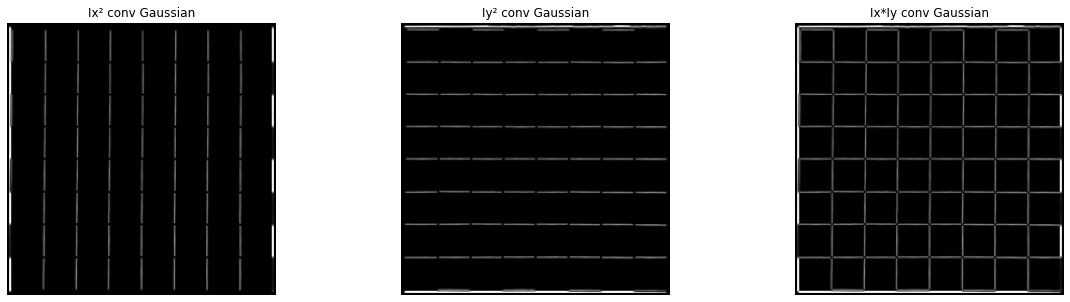

In [5]:
# calculating Ix**2, Iy **2 and IxIy
Ix = imXabT * imXabT
Iy = imXbaT * imXbaT
IxIy = imXabT * imXbaT

# smoothing the results with gaussian filter with 9x9 window and sigma = 2 (already in OpenCV library)
Ixg = cv2.GaussianBlur(Ix, (9,9),2)
Iyg = cv2.GaussianBlur(Iy, (9,9),2)
IxIyg = cv2.GaussianBlur(IxIy, (9,9),2)
IxIy2 = np.hypot(Ix, Iy)

# show the results 
ig2, axs = plt.subplots(1,3, figsize=(20, 5))
axs[0].set_title('Ix² conv Gaussian')
axs[0].axis('off')
axs[0].imshow(Ix, cmap='gray')

axs[1].set_title('Iy² conv Gaussian')
axs[1].axis('off')
axs[1].imshow(Iy, cmap='gray')

axs[2].set_title('Ix*Iy conv Gaussian')
axs[2].axis('off')
axs[2].imshow(IxIy2, cmap='gray')
plt.show(ig2)

In [6]:
#tranform from image to array 
Ixgdata = np.asarray(Ixg)
Iygdata = np.asarray(Iyg)
IxIygdata = np.asarray(IxIyg)


time tooked 2.7985455989837646


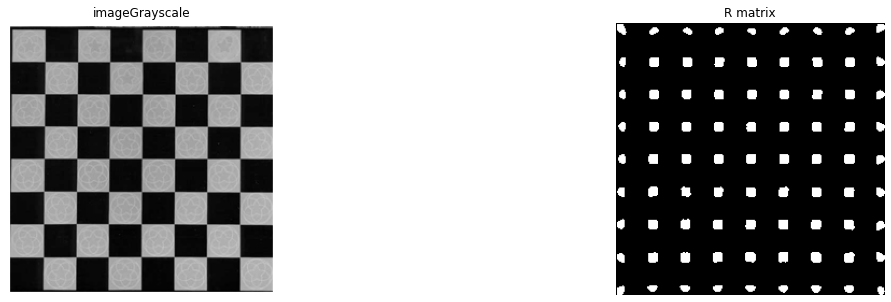

In [7]:

#harris respsonse calculation 
# list to store the x and y of every r calculated above a threshold 
corner_list =[]
# w = 3 (neighboring) 
window_size = 3
#to move by int (3/2) = 1 
offset = int(window_size/2)
# k value 
k = 0.04

# create empty image
output_img = np.zeros((img.shape[0], img.shape[1], 1), dtype = "uint8")

# calculating time 
current_time = time.time()

# move in an image to get the value M in every window
for y in range(offset, img.shape[0]):
        for x in range(offset, img.shape[1]):
            
            #set window coordinates 
            start_y = y - offset
            end_y = y + offset + 1
            start_x = x - offset
            end_x = x + offset + 1
            
            # get the corresponding area 
            windowIx = Ixgdata[start_y : end_y, start_x : end_x]
            windowIxIy = IxIygdata[start_y : end_y, start_x : end_x]
            windowIy = Iygdata[start_y : end_y, start_x : end_x]
            
            # calculate sum of M foreach pixel  
            Sxx = windowIx.sum()
            Sxy = windowIxIy.sum() 
            Syy = windowIy.sum()    
            
            #Calculate determinant and trace of the matrix
            det = (Sxx * Syy) - (Sxy**2)
            trace = Sxx + Syy 
            
            #Calculate r for Harris Corner equation
            r = det - k*(trace**2)
           
            # we set a threshold 
            if r > 10000000000.0:
                     corner_list.append([x, y, r])
                     output_img[y][x] = 180
                        
end_time = time.time()

# calculate the tooked time and print  
print('time tooked' , end_time - current_time)

# show the result of R matrix with the original 
ig3, axs = plt.subplots(1,2, figsize=(20, 5))
axs[0].set_title('imageGrayscale')
axs[0].axis('off')
axs[0].imshow(img, cmap='gray')

axs[1].set_title('R matrix')
axs[1].axis('off')
axs[1].imshow(output_img, cmap='gray')


In [8]:
#sort the array by r value (third element of corner_list)(Descending)
corner_list.sort(key=lambda x: x[2], reverse = True)

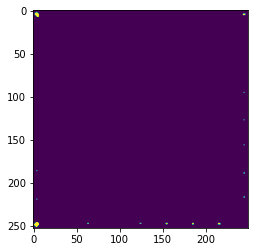

In [11]:

#creat a new image 
output_imgSorted = np.zeros((img.shape[0], img.shape[1], 1), dtype = np.int)

i = 0

#get x and y of the first 81 corners 
while i < 81:
    
    output_imgSorted[corner_list[i][1]][corner_list[i][0]] = 255
    i+=1

#print the 81 largest r 
plt.imshow(output_imgSorted)



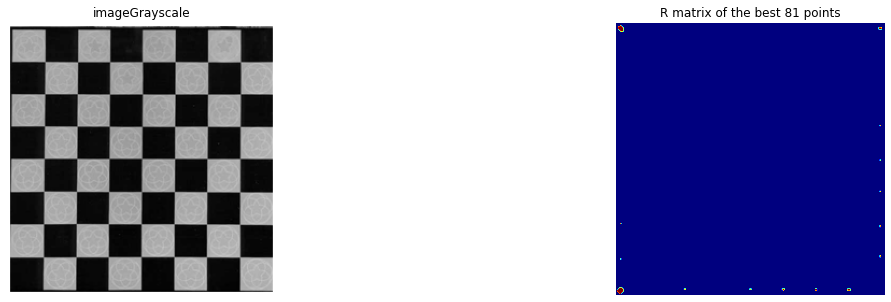

In [12]:

ig4, axs = plt.subplots(1,2, figsize=(20, 5))
axs[0].set_title('imageGrayscale')
axs[0].axis('off')
axs[0].imshow(img, cmap='gray')


axs[1].set_title('R matrix of the best 81 points')
axs[1].axis('off')
axs[1].imshow(output_imgSorted, cmap='jet')

